# ***PREPROCESSING DATA***

In [1]:
import pandas as pd

data = pd.read_csv('dataset_tiktok-hashtag-scraper_2025-11-20_12-59-51-711.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   authorMeta.avatar        466 non-null    object
 1   authorMeta.name          466 non-null    object
 2   text                     466 non-null    object
 3   diggCount                466 non-null    int64 
 4   shareCount               466 non-null    int64 
 5   playCount                466 non-null    int64 
 6   commentCount             466 non-null    int64 
 7   videoMeta.duration       466 non-null    int64 
 8   musicMeta.musicName      466 non-null    object
 9   musicMeta.musicAuthor    465 non-null    object
 10  musicMeta.musicOriginal  466 non-null    bool  
 11  createTimeISO            466 non-null    object
 12  webVideoUrl              466 non-null    object
dtypes: bool(1), int64(5), object(7)
memory usage: 44.3+ KB


In [ ]:
data = pd.DataFrame(data[['text']])
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    466 non-null    object
dtypes: object(1)
memory usage: 3.8+ KB


,text
0,Sebuah video yang viral di media sosial memicu...
1,MinSu kaget tahunya digoreng lagi???\nDi tenga...
2,yang terakhir manusia apa kambing 😭😭\n#fyp #mb...
3,#mbg #keracunan #fyp
4,MBG
5,#keracunan#mbg#fyp
6,omaga#fyppppppppppppppppppppppp#mbg#daily#scho...
7,#fyppppppppppppppppppppppp #keracunanmbg #mbg
8,#mbg #mbglovers❤️
9,prasmanan mbg edisi ngasi makan orang utan #fy...


**PROSES HAPUS DATA DUPLIKAT**

---



In [ ]:
data.drop_duplicates(subset ="text", keep = 'first', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 465
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    439 non-null    object
dtypes: object(1)
memory usage: 6.9+ KB


**WORDCLOUD SEBELUM PREPROCESSING**

---



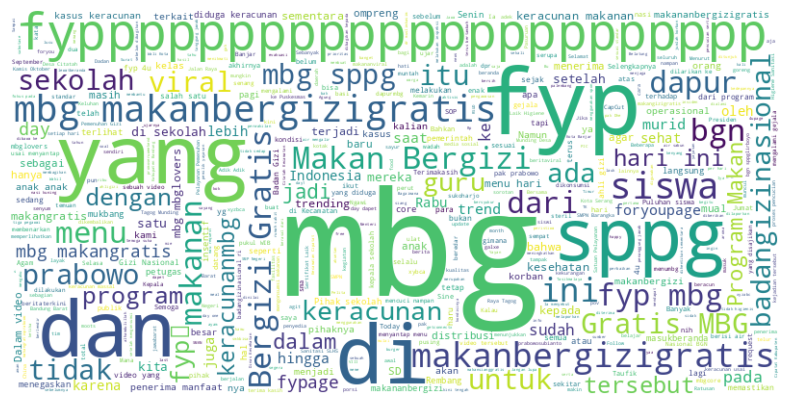

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

data['text'] = data['text'].fillna('')

text = ' '.join(data['text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

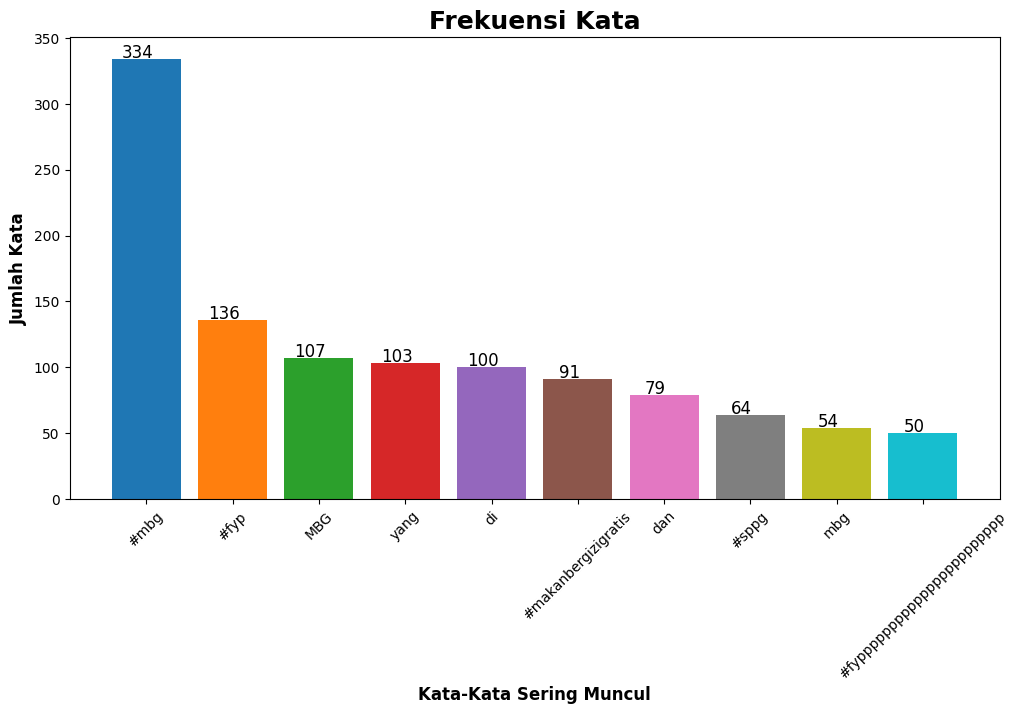

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(data["text"])
tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)
colors = plt.cm.tab10(range(len(word)))
plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

**PROSES CLEANING**

---



In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)  # Menghapus semua simbol
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)  # Menghapus semua angka
    return tweet

def remove_username(text):
    import re
    return re.sub(r'@[^\s]+', '', text)

# Fungsi untuk menghapus hashtag
def remove_hashtag(tweet):
    if tweet is not None and isinstance(tweet, str):
        hashtag_pattern = re.compile(r'#\S+')
        return hashtag_pattern.sub(r'', tweet)
    else:
        return tweet

data['cleaning'] = data['text'].apply(lambda x: remove_URL(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_username(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_hashtag(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_html(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_emoji(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_symbols(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_numbers(x))
data.head(5)

,text,cleaning
0,Sebuah video yang viral di media sosial memicu...,Sebuah video yang viral di media sosial memicu...
1,MinSu kaget tahunya digoreng lagi???\nDi tenga...,MinSu kaget tahunya digoreng lagi\nDi tengah h...
2,yang terakhir manusia apa kambing 😭😭\n#fyp #mb...,yang terakhir manusia apa kambing \n
3,#mbg #keracunan #fyp,
4,MBG,MBG


**PROSES CASE FOLDING**

---



In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

data['case_folding'] = data['cleaning'].apply(case_folding)
data.head(5)

,text,cleaning,case_folding
0,Sebuah video yang viral di media sosial memicu...,Sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...
1,MinSu kaget tahunya digoreng lagi???\nDi tenga...,MinSu kaget tahunya digoreng lagi\nDi tengah h...,minsu kaget tahunya digoreng lagi\ndi tengah h...
2,yang terakhir manusia apa kambing 😭😭\n#fyp #mb...,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing \n
3,#mbg #keracunan #fyp,,
4,MBG,MBG,mbg


**Normalisasi Kata**

---



In [ ]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []
        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# Baca dataset
data =  pd.DataFrame(data[['text','cleaning','case_folding']])
data.head(5)

,text,cleaning,case_folding
0,Sebuah video yang viral di media sosial memicu...,Sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...
1,MinSu kaget tahunya digoreng lagi???\nDi tenga...,MinSu kaget tahunya digoreng lagi\nDi tengah h...,minsu kaget tahunya digoreng lagi\ndi tengah h...
2,yang terakhir manusia apa kambing 😭😭\n#fyp #mb...,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing \n
3,#mbg #keracunan #fyp,,
4,MBG,MBG,mbg


In [ ]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku01.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['hasil_normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))
df =  pd.DataFrame(data[['text','cleaning','case_folding','hasil_normalisasi']])
df.head(20)

,text,cleaning,case_folding,hasil_normalisasi
0,Sebuah video yang viral di media sosial memicu...,Sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...
1,MinSu kaget tahunya digoreng lagi???\nDi tenga...,MinSu kaget tahunya digoreng lagi\nDi tengah h...,minsu kaget tahunya digoreng lagi\ndi tengah h...,minsu kaget tahunya digoreng lagi di tengah hu...
2,yang terakhir manusia apa kambing 😭😭\n#fyp #mb...,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing
3,#mbg #keracunan #fyp,,,
4,MBG,MBG,mbg,makan bergizi gratis
5,#keracunan#mbg#fyp,,,
6,omaga#fyppppppppppppppppppppppp#mbg#daily#scho...,omaga,omaga,omaga
7,#fyppppppppppppppppppppppp #keracunanmbg #mbg,,,
8,#mbg #mbglovers❤️,,,
9,prasmanan mbg edisi ngasi makan orang utan #fy...,prasmanan mbg edisi ngasi makan orang utan,prasmanan mbg edisi ngasi makan orang utan,prasmanan makan bergizi gratis edisi mengasih ...


**TOKENIZATION**

---



In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens
df['tokenize'] = df['hasil_normalisasi'].apply(tokenize)
df.head(5)

,text,cleaning,case_folding,hasil_normalisasi,tokenize
0,Sebuah video yang viral di media sosial memicu...,Sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...,"[sebuah, video, yang, viral, di, media, sosial..."
1,MinSu kaget tahunya digoreng lagi???\nDi tenga...,MinSu kaget tahunya digoreng lagi\nDi tengah h...,minsu kaget tahunya digoreng lagi\ndi tengah h...,minsu kaget tahunya digoreng lagi di tengah hu...,"[minsu, kaget, tahunya, digoreng, lagi, di, te..."
2,yang terakhir manusia apa kambing 😭😭\n#fyp #mb...,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing,"[yang, terakhir, manusia, apa, kambing]"
3,#mbg #keracunan #fyp,,,,[]
4,MBG,MBG,mbg,makan bergizi gratis,"[makan, bergizi, gratis]"


**PROSES STOPWORD REMOVAL**

---



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(5)

,text,cleaning,case_folding,hasil_normalisasi,tokenize,stopword removal
0,Sebuah video yang viral di media sosial memicu...,Sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...,"[sebuah, video, yang, viral, di, media, sosial...","[video, viral, media, sosial, memicu, keheboha..."
1,MinSu kaget tahunya digoreng lagi???\nDi tenga...,MinSu kaget tahunya digoreng lagi\nDi tengah h...,minsu kaget tahunya digoreng lagi\ndi tengah h...,minsu kaget tahunya digoreng lagi di tengah hu...,"[minsu, kaget, tahunya, digoreng, lagi, di, te...","[minsu, kaget, tahunya, digoreng, huruhara, ke..."
2,yang terakhir manusia apa kambing 😭😭\n#fyp #mb...,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing,"[yang, terakhir, manusia, apa, kambing]","[manusia, kambing]"
3,#mbg #keracunan #fyp,,,,[],[]
4,MBG,MBG,mbg,makan bergizi gratis,"[makan, bergizi, gratis]","[makan, bergizi, gratis]"


**PROSES STEAMING DATA**

---



In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.3 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,text,cleaning,case_folding,hasil_normalisasi,tokenize,stopword removal,steming_data
0,Sebuah video yang viral di media sosial memicu...,Sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...,"[sebuah, video, yang, viral, di, media, sosial...","[video, viral, media, sosial, memicu, keheboha...",video viral media sosial picu heboh publik rek...
1,MinSu kaget tahunya digoreng lagi???\nDi tenga...,MinSu kaget tahunya digoreng lagi\nDi tengah h...,minsu kaget tahunya digoreng lagi\ndi tengah h...,minsu kaget tahunya digoreng lagi di tengah hu...,"[minsu, kaget, tahunya, digoreng, lagi, di, te...","[minsu, kaget, tahunya, digoreng, huruhara, ke...",minsu kaget tahu goreng huruhara racun makan g...
2,yang terakhir manusia apa kambing 😭😭\n#fyp #mb...,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing,"[yang, terakhir, manusia, apa, kambing]","[manusia, kambing]",manusia kambing
3,#mbg #keracunan #fyp,,,,[],[],
4,MBG,MBG,mbg,makan bergizi gratis,"[makan, bergizi, gratis]","[makan, bergizi, gratis]",makan gizi gratis


**PROSES HAPUS DATA BERNILAI KOSONG (NAN)**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 465
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               439 non-null    object
 1   cleaning           439 non-null    object
 2   case_folding       439 non-null    object
 3   hasil_normalisasi  439 non-null    object
 4   tokenize           439 non-null    object
 5   stopword removal   439 non-null    object
 6   steming_data       439 non-null    object
dtypes: object(7)
memory usage: 27.4+ KB


In [ ]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 465
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               439 non-null    object
 1   cleaning           439 non-null    object
 2   case_folding       439 non-null    object
 3   hasil_normalisasi  439 non-null    object
 4   tokenize           439 non-null    object
 5   stopword removal   439 non-null    object
 6   steming_data       439 non-null    object
dtypes: object(7)
memory usage: 27.4+ KB


**WORDCLOUD SETELAH PREPROCESSING**

---



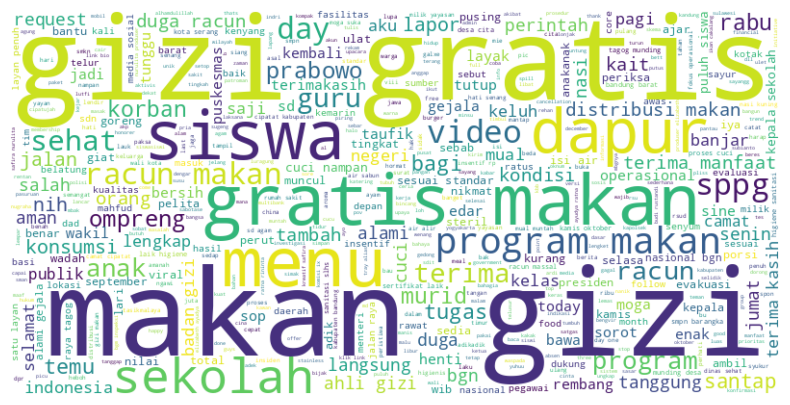

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(data['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','lu','deh','fyp', 'ya', 'gue', 'sih','aplikasi'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

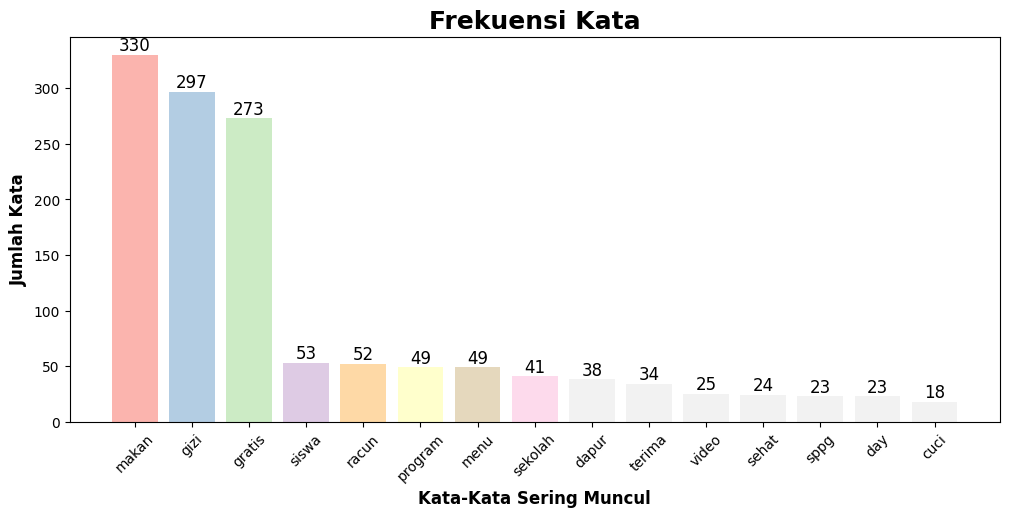

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(data["steming_data"])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','lu','deh','fyp', 'ya', 'gue', 'sih','aplikasi'])
tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)
top_words = word_counts.most_common(15)
word, count = zip(*top_words)
colors = plt.cm.Pastel1(range(len(word)))

# Membuat plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 0.15, str(num),
             fontsize=12, color='black', ha='center', va='bottom')

# Menampilkan plot
plt.show()


In [2]:
data.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False)

# ***PELEBALAN DATA METODE LAXICON BASED 3 CLASS***

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               439 non-null    object
 1   cleaning           435 non-null    object
 2   case_folding       435 non-null    object
 3   hasil_normalisasi  347 non-null    object
 4   tokenize           439 non-null    object
 5   stopword removal   439 non-null    object
 6   steming_data       343 non-null    object
dtypes: object(7)
memory usage: 24.1+ KB


,text,cleaning,case_folding,hasil_normalisasi,tokenize,stopword removal,steming_data
0,Sebuah video yang viral di media sosial memicu...,Sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...,sebuah video yang viral di media sosial memicu...,"['sebuah', 'video', 'yang', 'viral', 'di', 'me...","['video', 'viral', 'media', 'sosial', 'memicu'...",video viral media sosial picu heboh publik rek...
1,MinSu kaget tahunya digoreng lagi???\nDi tenga...,MinSu kaget tahunya digoreng lagi\nDi tengah h...,minsu kaget tahunya digoreng lagi\ndi tengah h...,minsu kaget tahunya digoreng lagi di tengah hu...,"['minsu', 'kaget', 'tahunya', 'digoreng', 'lag...","['minsu', 'kaget', 'tahunya', 'digoreng', 'hur...",minsu kaget tahu goreng huruhara racun makan g...
2,yang terakhir manusia apa kambing 😭😭\n#fyp #mb...,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing \n,yang terakhir manusia apa kambing,"['yang', 'terakhir', 'manusia', 'apa', 'kambing']","['manusia', 'kambing']",manusia kambing
3,#mbg #keracunan #fyp,,,NaN,[],[],NaN
4,MBG,MBG,mbg,makan bergizi gratis,"['makan', 'bergizi', 'gratis']","['makan', 'bergizi', 'gratis']",makan gizi gratis


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 438
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               343 non-null    object
 1   cleaning           343 non-null    object
 2   case_folding       343 non-null    object
 3   hasil_normalisasi  343 non-null    object
 4   tokenize           343 non-null    object
 5   stopword removal   343 non-null    object
 6   steming_data       343 non-null    object
dtypes: object(7)
memory usage: 21.4+ KB


In [ ]:
data = pd.DataFrame(data[['steming_data']])
data.head(5)

,steming_data
0,video viral media sosial picu heboh publik rek...
1,minsu kaget tahu goreng huruhara racun makan g...
2,manusia kambing
4,makan gizi gratis
6,omaga


In [ ]:
import pandas as pd
import requests

# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"
positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"
        return sentiment_score, sentiment
    return 0, "Netral"


# Tentukan sentimen dan skor untuk setiap ulasan
data[['Score', 'Sentiment']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
data.head(20)


,steming_data,Score,Sentiment
0,video viral media sosial picu heboh publik rek...,5,Positif
1,minsu kaget tahu goreng huruhara racun makan g...,7,Positif
2,manusia kambing,0,Netral
4,makan gizi gratis,1,Positif
6,omaga,0,Netral
9,prasmanan makan gizi gratis edisi asih makan o...,1,Positif
11,guru tumbal negara program makan gizi gratis,2,Positif
12,mbak maya salah pegawai sppg bogor syukur bang...,6,Positif
13,tunggu menu menu,0,Netral
14,laku sehatsehat ya,1,Positif


/tmp/ipython-input-1910355637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


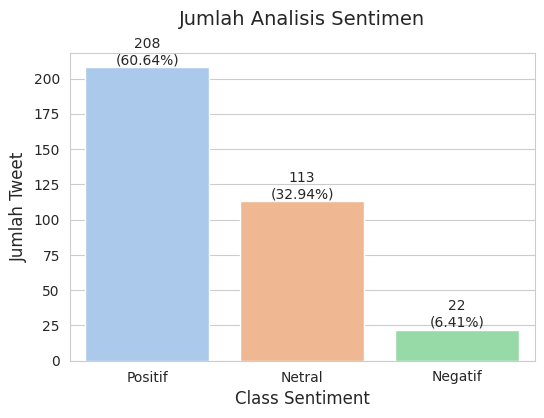

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
total = len(data['Sentiment'])
for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')
plt.show()

In [ ]:
data.to_csv('Hasil_Labelling_Data_3class.csv',encoding='utf8', index=False)

# ***WORDCLOUD***



In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data_3class.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  343 non-null    object
 1   Score         343 non-null    int64 
 2   Sentiment     343 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


,steming_data,Score,Sentiment
0,video viral media sosial picu heboh publik rek...,5,Positif
1,minsu kaget tahu goreng huruhara racun makan g...,7,Positif
2,manusia kambing,0,Netral
3,makan gizi gratis,1,Positif
4,omaga,0,Netral


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  343 non-null    object
 1   Score         343 non-null    int64 
 2   Sentiment     343 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


In [ ]:
data = pd.DataFrame(data[['steming_data','Sentiment']])
data.head(5)

,steming_data,Sentiment
0,video viral media sosial picu heboh publik rek...,Positif
1,minsu kaget tahu goreng huruhara racun makan g...,Positif
2,manusia kambing,Netral
3,makan gizi gratis,Positif
4,omaga,Netral


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_Neutral = data[data['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs', 'kayak',
    'nih', 'termul', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk',
    'ajar', 'si', 'ok', 'gas', 'omon', 'nyinyir', 'no', 'rocky', 'party', 'kapolri',
    'tni', 'panglima', 'ajaib', 'dah', 'dong', 'banget', 'udah', 'bikin', 'buat',
    'bgt', 'kak', 'trs', 'krn', 'dgn', 'biar', 'kan', 'nyaa', 'lah', 'nyaaa'
])

# Buat wordcloud untuk masing-masing sentimen
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(sentimen_Neutral)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds', stopwords=stopwords).generate(sentimen_Negative)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens', stopwords=stopwords).generate(sentimen_Positive)

# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


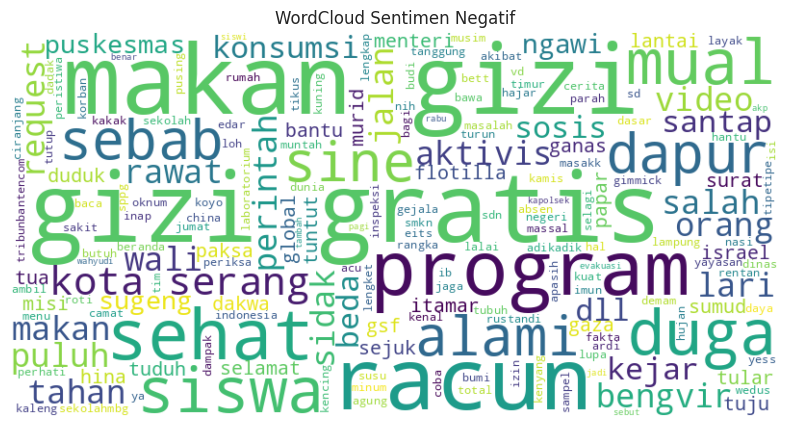

In [ ]:
# Membuat WordCloud untuk sentimen Negatif
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')

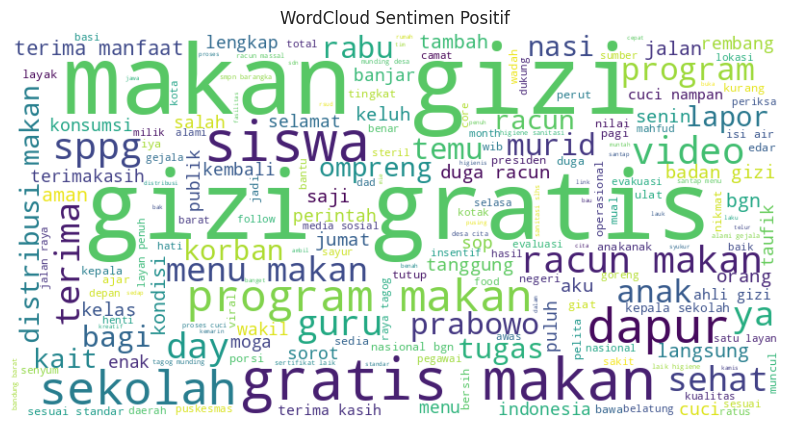

In [ ]:
# Membuat WordCloud untuk sentimen Positif
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positif')

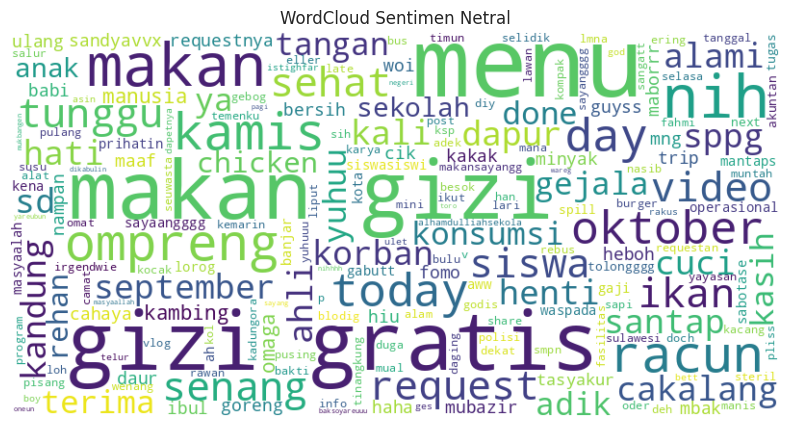

In [ ]:
# Membuat WordCloud untuk sentimen Netral
create_wordcloud(sentimen_Neutral, 'WordCloud Sentimen Netral')

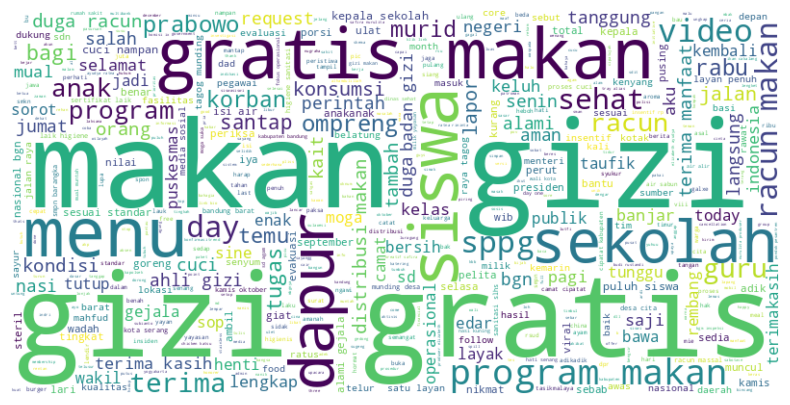

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
data['steming_data'] = data['steming_data'].fillna('')
# Menggabungkan teks dari kolom
text = ' '.join(data['steming_data'].astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs', 'kayak',
    'nih', 'termul', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk',
    'ajar', 'si', 'ok', 'dm', 'omon', 'nyinyir', 'no', 'rocky', 'party', 'kapolri',
    'tni', 'panglima', 'ajaib', 'dah', 'dong', 'banget', 'udah', 'bikin', 'buat',
    'bgt', 'kak', 'trs', 'krn', 'dgn', 'yuk', 'kan', 'kakak', 'lah', 'nyaaa'])
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, width=800, height=400)
wc.generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# ***FREKUENSI KATA***



In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data_3class.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  343 non-null    object
 1   Score         343 non-null    int64 
 2   Sentiment     343 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


,steming_data,Score,Sentiment
0,video viral media sosial picu heboh publik rek...,5,Positif
1,minsu kaget tahu goreng huruhara racun makan g...,7,Positif
2,manusia kambing,0,Netral
3,makan gizi gratis,1,Positif
4,omaga,0,Netral


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  343 non-null    object
 1   Score         343 non-null    int64 
 2   Sentiment     343 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


In [ ]:
data = pd.DataFrame(data[['steming_data','Sentiment']])
data.head(5)

,steming_data,Sentiment
0,video viral media sosial picu heboh publik rek...,Positif
1,minsu kaget tahu goreng huruhara racun makan g...,Positif
2,manusia kambing,Netral
3,makan gizi gratis,Positif
4,omaga,Netral


In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

# Pisahkan dataset berdasarkan sentimen
sentimen_Neutral = data[data['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

# Stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs', 'kayak',
    'nih', 'termul', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk',
    'ajar', 'si', 'ok', 'gas', 'omon', 'nyinyir', 'no', 'rocky', 'party', 'kapolri',
    'tni', 'panglima', 'ajaib', 'dah', 'dong', 'banget', 'udah', 'bikin', 'buat',
    'bgt', 'kayaknya', 'trs', 'krn', 'dgn', 'biar', 'kan', 'nyaa', 'lah', 'nyaaa'
])

# Fungsi hitung frekuensi kata + tampilkan jumlah
def plot_word_freq(text, title, color):
    words = [w for w in text.split() if w not in stopwords]
    word_freq = Counter(words).most_common(10)  # ambil 10 kata teratas
    df_freq = pd.DataFrame(word_freq, columns=['Kata', 'Frekuensi'])

    plt.figure(figsize=(8,5))
    bars = plt.barh(df_freq['Kata'], df_freq['Frekuensi'], color=color)
    plt.gca().invert_yaxis()  # biar kata frekuensi tertinggi di atas
    plt.title(f"Top 10 Kata - Sentimen {title}", fontsize=14)
    plt.xlabel("Frekuensi")
    plt.ylabel("Kata")

    # Tambahkan label jumlah di ujung bar
    for bar in bars:
        plt.text(
            bar.get_width() + 0.2,  # posisi X sedikit ke kanan
            bar.get_y() + bar.get_height()/2,  # posisi Y di tengah bar
            str(int(bar.get_width())),  # nilai frekuensi
            va='center'
        )

    plt.show()

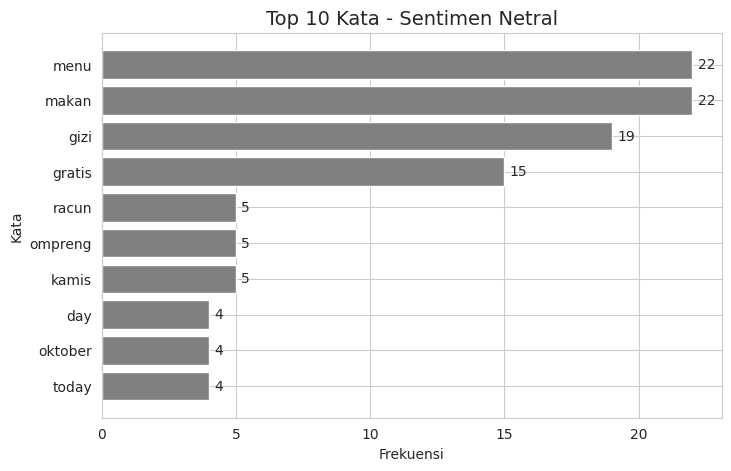

In [ ]:
plot_word_freq(sentimen_Neutral, "Netral", "gray")

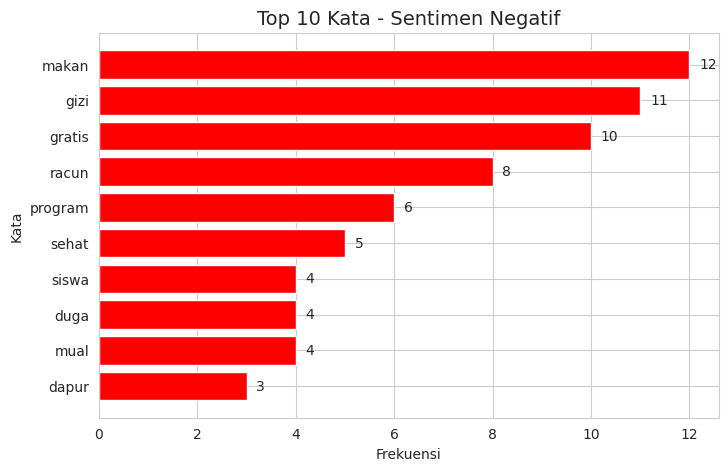

In [ ]:
plot_word_freq(sentimen_Negative, "Negatif", "red")

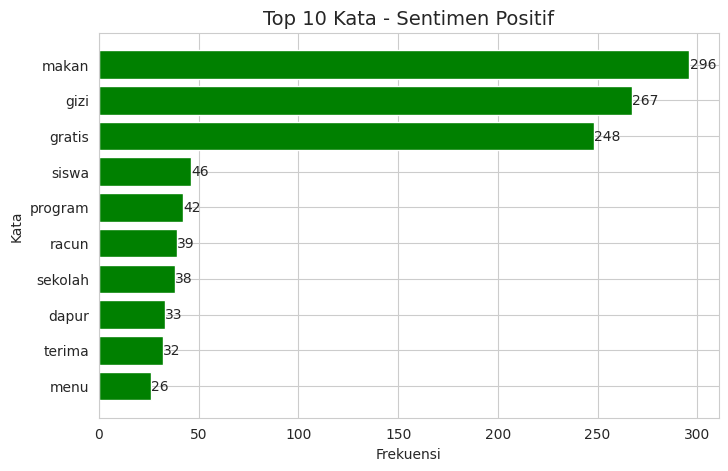

In [ ]:
plot_word_freq(sentimen_Positive, "Positif", "green")

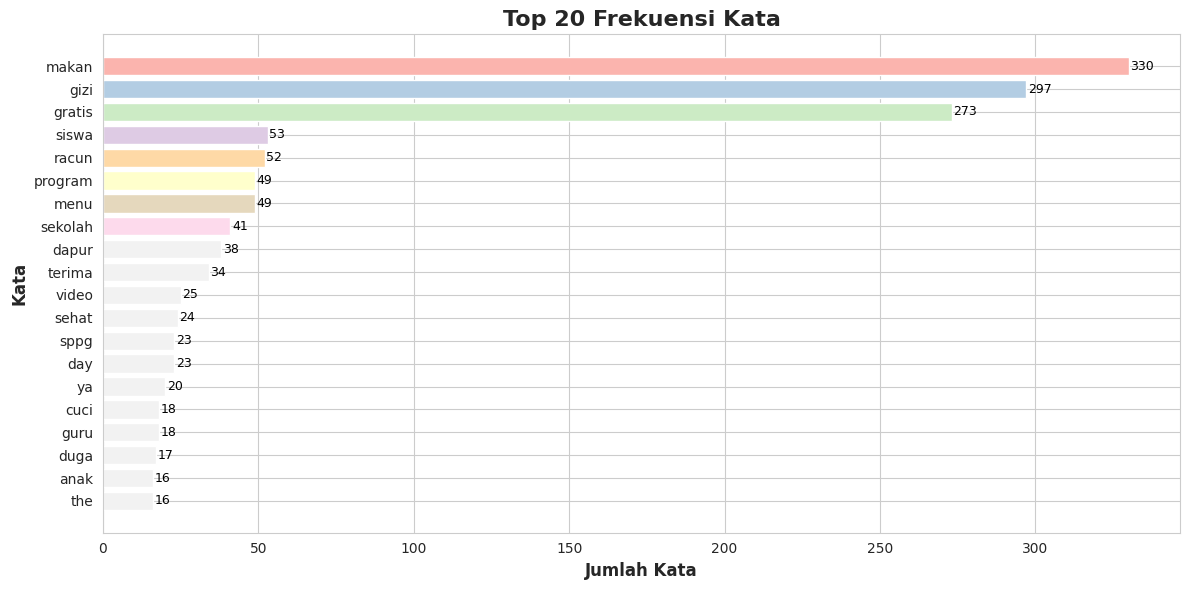

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua teks
text = " ".join(data["steming_data"])

tokens = text.split()
word_counts = Counter(tokens)

# Ambil 20 kata teratas
top_words = word_counts.most_common(20)
word, count = zip(*top_words)

# Palet warna soft (Pastel)
colors = plt.cm.Pastel1(range(len(word)))
plt.figure(figsize=(12, 6))
bars = plt.barh(word, count, color=colors)
plt.xlabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.ylabel("Kata", fontsize=12, fontweight='bold')
plt.title("Top 20 Frekuensi Kata", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Biar frekuensi tertinggi di atas

# Tambahkan angka di ujung bar
for bar, num in zip(bars, count):
    plt.text(num + 0.5, bar.get_y() + bar.get_height()/2,
             str(num), va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


# ***N-Gram Frekuensi Kata***



In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data_3class.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  343 non-null    object
 1   Score         343 non-null    int64 
 2   Sentiment     343 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


,steming_data,Score,Sentiment
0,video viral media sosial picu heboh publik rek...,5,Positif
1,minsu kaget tahu goreng huruhara racun makan g...,7,Positif
2,manusia kambing,0,Netral
3,makan gizi gratis,1,Positif
4,omaga,0,Netral


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  343 non-null    object
 1   Score         343 non-null    int64 
 2   Sentiment     343 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


In [ ]:
data = pd.DataFrame(data[['steming_data','Sentiment']])
data.head(5)

,steming_data,Sentiment
0,video viral media sosial picu heboh publik rek...,Positif
1,minsu kaget tahu goreng huruhara racun makan g...,Positif
2,manusia kambing,Netral
3,makan gizi gratis,Positif
4,omaga,Netral


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Stopwords tambahan
custom_stopwords = set(ENGLISH_STOP_WORDS)
custom_stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs', 'kayak',
    'nih', 'termul', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk',
    'ajar', 'si', 'ok', 'gas', 'omon', 'nyinyir', 'no', 'rocky', 'party', 'kapolri',
    'tni', 'panglima', 'ajaib', 'dah', 'dong', 'banget', 'udah', 'bikin', 'buat',
    'bgt', 'kayaknya', 'trs', 'krn', 'dgn', 'biar', 'kan', 'nyaa', 'lah', 'nyaaa'
])

# Fungsi buat ambil n-gram
def get_top_ngrams(corpus, n=3, top_k=10, stopwords=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Fungsi buat plot frekuensi n-gram
def plot_ngrams(corpus, sentiment_label, color_map=plt.cm.Set2, stopwords=None):
    top_ngrams = get_top_ngrams(corpus, n=3, top_k=10, stopwords=stopwords)
    if not top_ngrams:
        print(f"Tidak ada trigram untuk sentimen {sentiment_label}")
        return

    ngrams, counts = zip(*top_ngrams)
    colors = color_map(range(len(ngrams)))

    plt.figure(figsize=(10,6))
    bars = plt.barh(ngrams, counts, color=colors)
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 Trigram - Sentimen {sentiment_label}", fontsize=16, fontweight='bold')
    plt.xlabel("Jumlah Kemunculan", fontsize=12)
    plt.ylabel("Trigram", fontsize=12)

    # Tambahin label jumlah di ujung bar
    for bar, num in zip(bars, counts):
        plt.text(num + 0.01, bar.get_y() + bar.get_height()/2,
                 str(num), va='center', fontsize=11, color='black')

    plt.tight_layout()
    plt.show()


# Ambil data per sentimen
corpus_neg = data[data['Sentiment'] == 'Negatif']['steming_data'].astype(str).tolist()
corpus_neu = data[data['Sentiment'] == 'Netral']['steming_data'].astype(str).tolist()
corpus_pos = data[data['Sentiment'] == 'Positif']['steming_data'].astype(str).tolist()

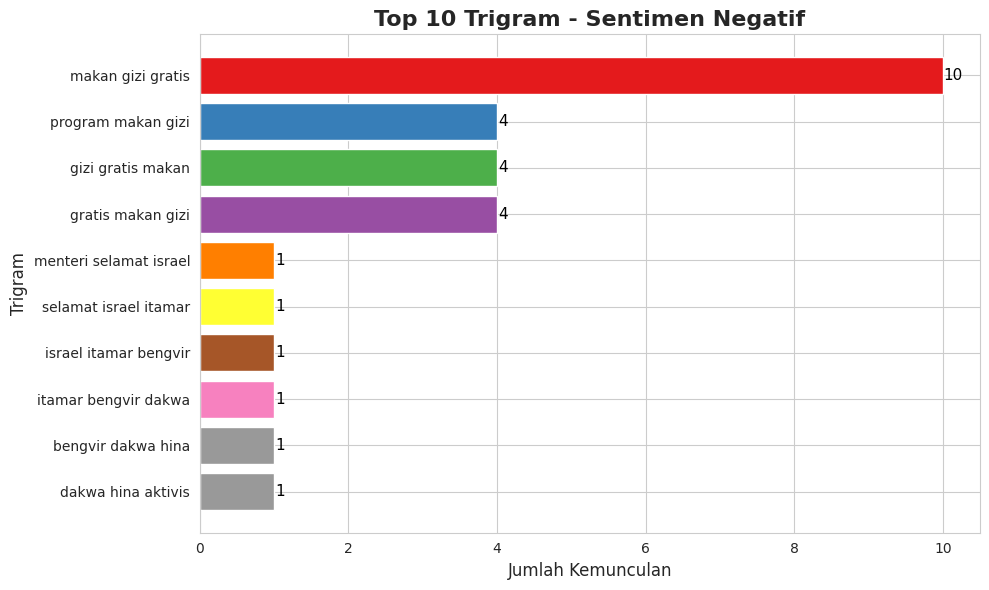

In [ ]:
plot_ngrams(corpus_neg, "Negatif", plt.cm.Set1)

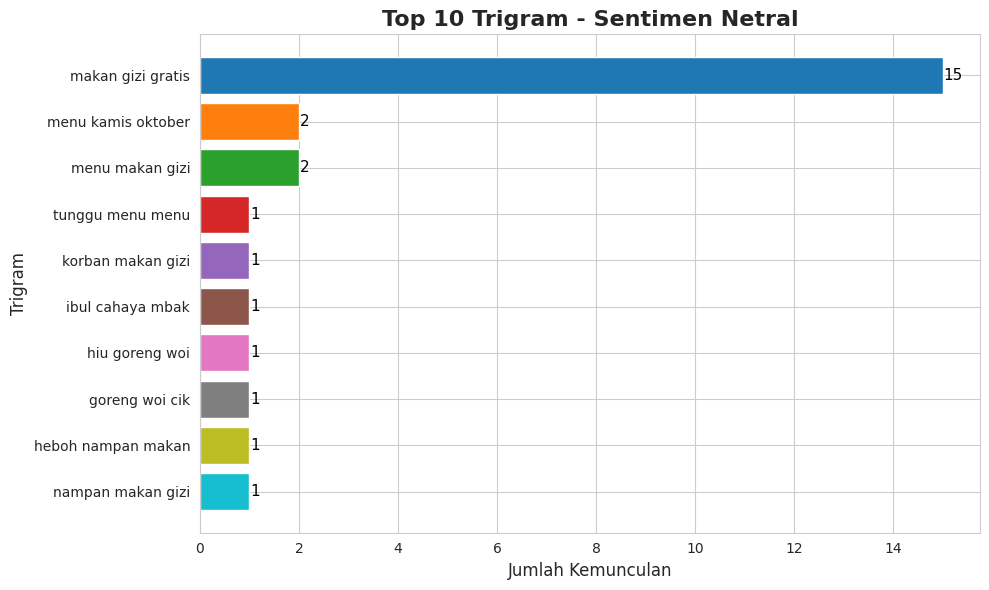

In [ ]:
plot_ngrams(corpus_neu, "Netral", plt.cm.tab10)

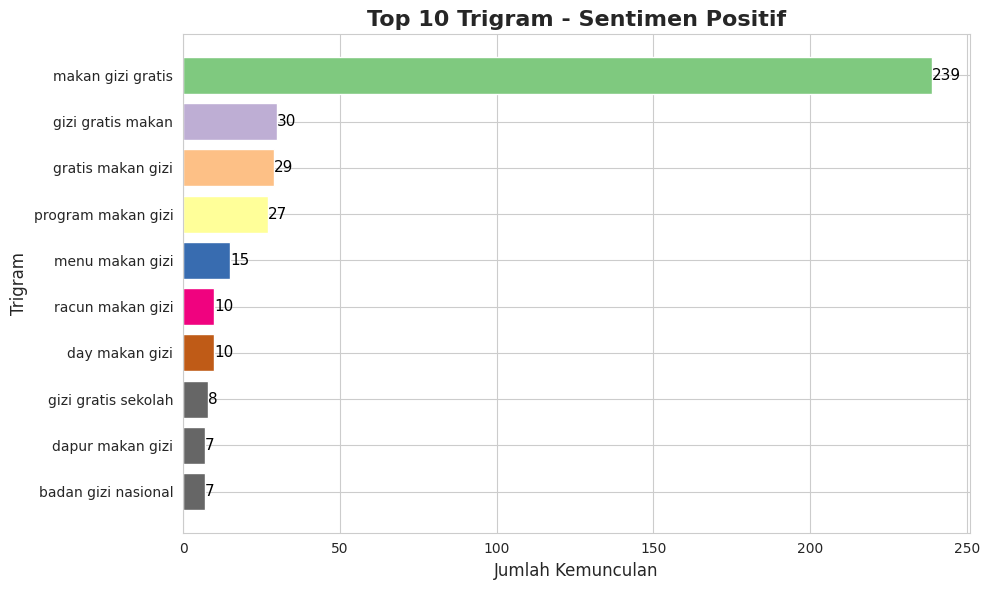

In [ ]:
plot_ngrams(corpus_pos, "Positif", plt.cm.Accent)

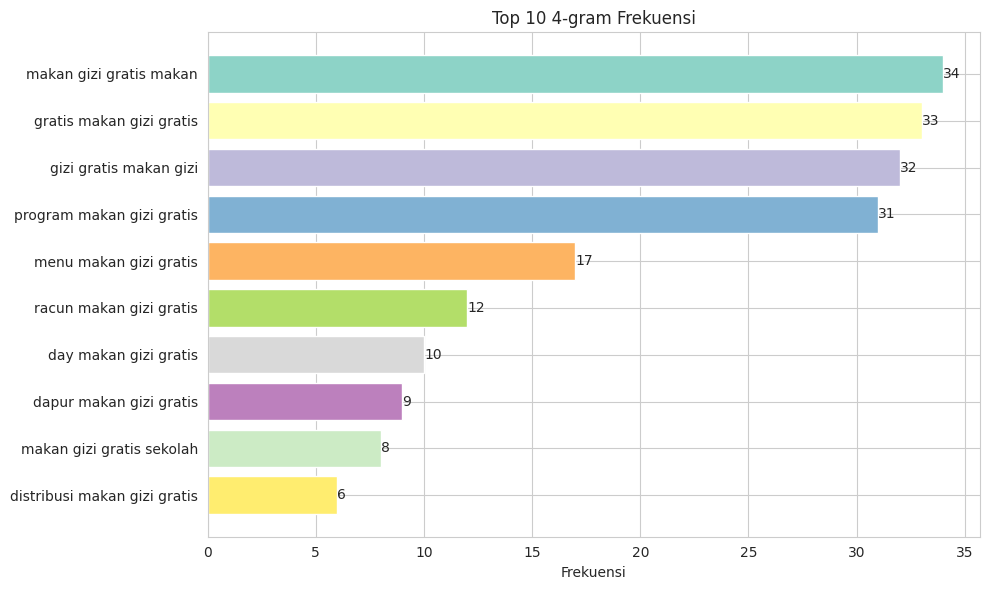

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Daftar stopwords tambahan
custom_stopwords = ['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue','cs','kayak','tiktok','logo',
                    'sih', 'yg', 'nya', 'hapus', 'sdh', 'download', 'ga', 'update', 'tik', 'ajar', 'si','tok','gas','omon','nyinyir',
                    'no','lag','party','hp','tni','panglima']

# Fungsi untuk membuat diagram batang frekuensi n-gram
def plot_ngram_frequencies(texts, ngram_range=(4,4), top_n=10, cmap=plt.cm.Set3):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=custom_stopwords)
    X = vectorizer.fit_transform(texts)

    # Hitung total frekuensi setiap n-gram
    ngram_counts = X.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    freq_dist = dict(zip(ngram_vocab, ngram_counts))

    # Ambil n-gram dengan frekuensi tertinggi
    top_ngrams = Counter(freq_dist).most_common(top_n)
    labels, values = zip(*top_ngrams)

    # Buat warna berbeda untuk tiap bar
    colors = cmap(np.linspace(0, 1, len(labels)))

    # Visualisasi
    plt.figure(figsize=(10, 6))
    bars = plt.barh(labels[::-1], values[::-1], color=colors[::-1])
    plt.title(f'Top {top_n} {ngram_range[0]}-gram Frekuensi')
    plt.xlabel('Frekuensi')

    # Tambahkan label angka di ujung bar
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

    plt.tight_layout()
    plt.show()

# Contoh pemanggilan: Visualisasi 4-gram
plot_ngram_frequencies(data['steming_data'], ngram_range=(4,4), top_n=10, cmap=plt.cm.Set3)


# ***SPLITTING DATA***

In [ ]:
import pandas as pd

file_path = "Hasil_Labelling_Data_3class.csv"
df = pd.read_csv(file_path)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  343 non-null    object
 1   Score         343 non-null    int64 
 2   Sentiment     343 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


,steming_data,Score,Sentiment
0,video viral media sosial picu heboh publik rek...,5,Positif
1,minsu kaget tahu goreng huruhara racun makan g...,7,Positif
2,manusia kambing,0,Netral
3,makan gizi gratis,1,Positif
4,omaga,0,Netral


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

df_clean = df.dropna(subset=['steming_data'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_clean['Sentiment'])

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_clean['steming_data'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'Negatif': np.int64(0), 'Netral': np.int64(1), 'Positif': np.int64(2)}

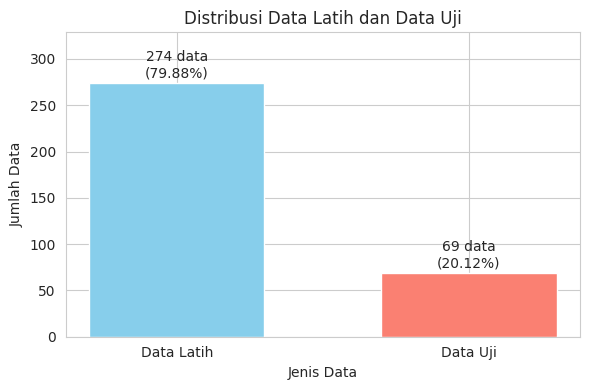

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_size = X_train.shape[0]
test_size = X_test.shape[0]
total_size = train_size + test_size

labels = ['Data Latih', 'Data Uji']
values = [train_size, test_size]
colors = ['skyblue', 'salmon']
x_pos = np.arange(len(labels))

plt.figure(figsize=(6, 4))
bars = plt.bar(x_pos, values, color=colors, width=0.6)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + 3,
             f'{height} data\n({height / total_size * 100:.2f}%)',
             ha='center',
             va='bottom',
             fontsize=10)

plt.xticks(x_pos, labels)
plt.title('Distribusi Data Latih dan Data Uji', fontsize=12)
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.ylim(0, max(values) * 1.2)
plt.tight_layout()
plt.show()


# ***SVM Karnel ('linear', 'rbf', 'poly', 'sigmoid')***

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define kernels to test
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}


=== Evaluasi Kernel: LINEAR ===
Akurasi: 0.7971

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         7
      Netral       0.69      0.87      0.77        23
     Positif       0.88      0.90      0.89        39

    accuracy                           0.80        69
   macro avg       0.52      0.59      0.55        69
weighted avg       0.72      0.80      0.76        69



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


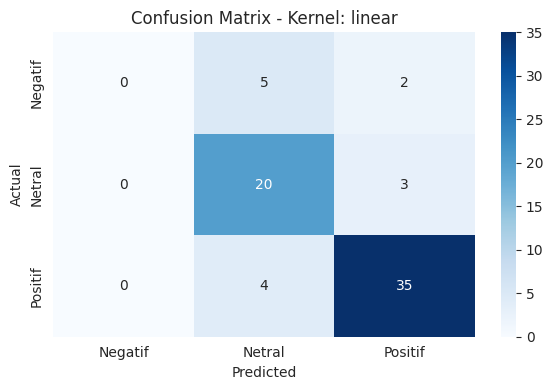


=== Evaluasi Kernel: RBF ===
Akurasi: 0.7536

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         7
      Netral       0.65      0.74      0.69        23
     Positif       0.81      0.90      0.85        39

    accuracy                           0.75        69
   macro avg       0.49      0.55      0.52        69
weighted avg       0.68      0.75      0.71        69



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


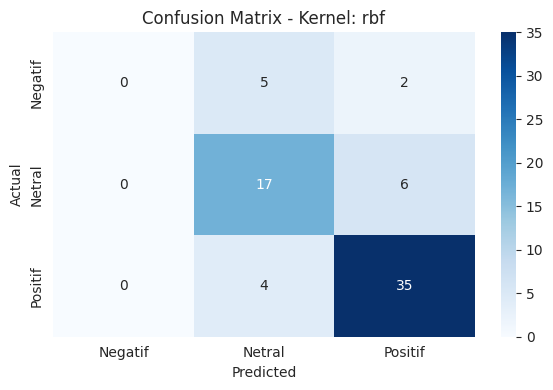


=== Evaluasi Kernel: POLY ===
Akurasi: 0.5797

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         7
      Netral       1.00      0.04      0.08        23
     Positif       0.57      1.00      0.73        39

    accuracy                           0.58        69
   macro avg       0.52      0.35      0.27        69
weighted avg       0.66      0.58      0.44        69



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


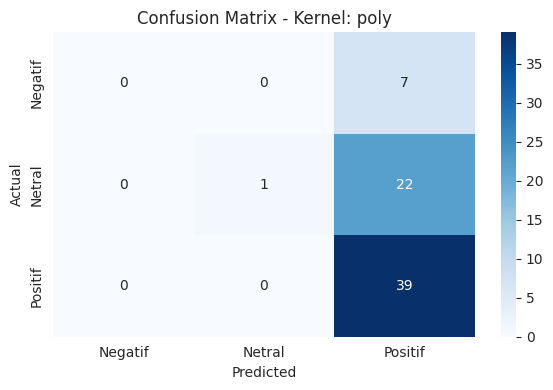


=== Evaluasi Kernel: SIGMOID ===
Akurasi: 0.7971

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         7
      Netral       0.69      0.87      0.77        23
     Positif       0.88      0.90      0.89        39

    accuracy                           0.80        69
   macro avg       0.52      0.59      0.55        69
weighted avg       0.72      0.80      0.76        69



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


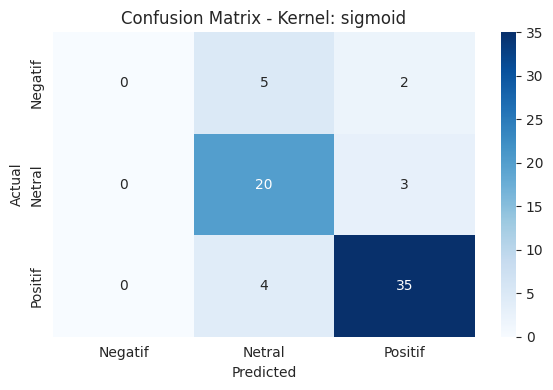

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_svm_kernel(kernel_name):
    print(f"\n=== Evaluasi Kernel: {kernel_name.upper()} ===")

    # Inisialisasi dan latih model
    model = SVC(kernel=kernel_name, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi dan evaluasi
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi: {acc:.4f}")

    # Classification report
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print("\nClassification Report:")
    print(report)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - Kernel: {kernel_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Evaluasi untuk setiap kernel
for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    evaluate_svm_kernel(kernel)


/tmp/ipython-input-183738865.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


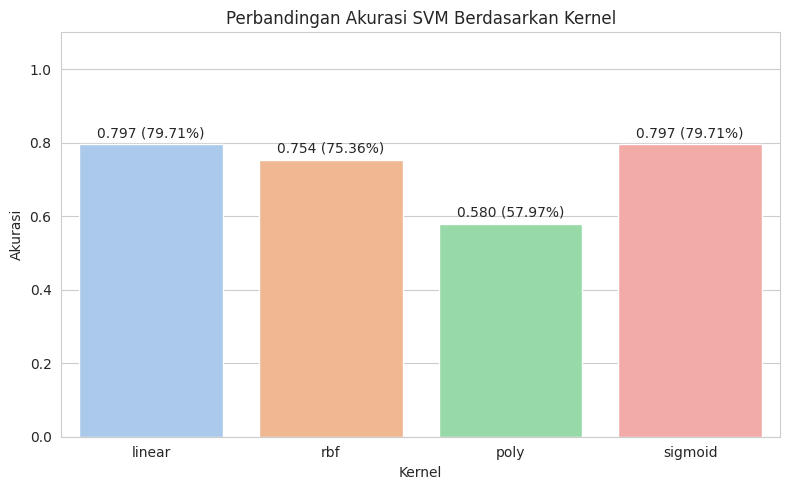

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

accuracy_results = {}

for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_results[kernel] = acc

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=list(accuracy_results.keys()),
    y=list(accuracy_results.values()),
    palette='pastel'
)
plt.title('Perbandingan Akurasi SVM Berdasarkan Kernel')
plt.ylabel('Akurasi')
plt.ylim(0, 1.1)
plt.xlabel('Kernel')

for bar in ax.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{height:.3f} ({height * 100:.2f}%)',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()